In [1]:
import testing as tst
import impute as imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
nombres_sarima=['tiempo','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
inputs=['time','Direct','Global','Temperatura','Humedad','ws','wd','P','Eg']
nombres_ann=['tiempo','Direct','Global','Difusa','Temperatura','Humedad','Presion']
# nombres_ann=['tiempo','#','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
sarima_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_1_multioneshot.csv',index_col=0,parse_dates=True,skiprows=1,names=nombres_sarima)
tmx_2018=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/tmx_base_2018_solar_angles.csv',index_col=0,parse_dates=True,names=nombres_sarima,skiprows=1)
ann_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)#('CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')

In [3]:
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')
yearly_ann,daily_ann,hourly_ann=tst.dfmetricas(ann_2018,tmx_2018,'CNN-LSTM')
# yearly_,daily_,hourly_=tst.dfmetricas(_2018,tmx_2018,'SARIMA(')
metricas=['model','E_dmae','E_dmape','mae_Ig']
df_metrics=pd.concat((yearly_ann[metricas],yearly_sarima[metricas]),ignore_index=True)
df_metrics[metricas]

,model,E_dmae,E_dmape,mae_Ig
0,CNN-LSTM,530.044127,11.204879,76.355088
1,"SARIMA(0,1,1)",628.485508,12.481125,89.337116


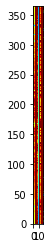

In [4]:
imshow=plt.imshow(daily_ann,cmap='jet',vmin=0,vmax=120,alpha=1,aspect='equal',origin='lower')

In [7]:
hourly_ann.to_csv('../../01_weather_data/03_imputing_process/ann_me.csv')
hourly_sarima.to_csv('../../01_weather_data/03_imputing_process/sarima_me.csv')

<ipython-input-5-11c142d5b366>:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
<ipython-input-5-11c142d5b366>:9: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')


(<Figure size 403.2x93.6 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

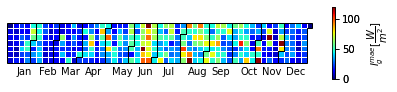

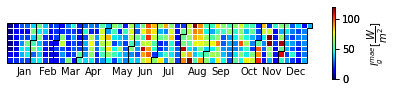

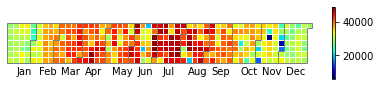

In [5]:
import calplot 
calplotsize=(5.6,1.3)
path_figures='../../../Tesis_repo/figures/'
calplot.calplot(daily_ann['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
# plt.savefig(path_figures+'testyear_ann.pdf')

calplot.calplot(daily_sarima['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
# plt.savefig(path_figures+'testyear_sarima.pdf')
calplot.calplot(tmx_2018['Global'],how='sum',cmap='jet',figsize=calplotsize,yearlabels=False,dayticks=False)



In [7]:
ms=[]
measured=np.stack(tmx_2018.Global)
predicted_ann=np.stack(ann_2018.Global)
predicted_sarima=np.stack(sarima_2018.Global)
reg_ann = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_ann)
b_ann=reg_ann.intercept_
m_ann=reg_ann.coef_
reg_sarima = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_sarima)
b_sarima=reg_sarima.intercept_
m_sarima=reg_sarima.coef_
ms.append(str(m_ann).replace('[','').replace(']',''))
ms.append(str(m_sarima).replace('[','').replace(']',''))
# np.array(m_ann,m_sarima)
# reg.fit()


NameError: name 'tmx_2018' is not defined

In [8]:
print('m_ann:',m_ann)
print('b_ann:',b_ann)
print('m_sarima',m_sarima)
print('b_sarima',b_sarima)
x = np.linspace(1,1200)
y = 1 * x 
y_ann = m_ann * x +b_ann
y_sarima = m_sarima * x +b_sarima


NameError: name 'm_ann' is not defined

In [9]:
r2s=[]
predict_ann = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_ann).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_ann = metrics.r2_score(predicted_ann,predict_ann)
predict_sarima = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_sarima).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_sarima = metrics.r2_score(predicted_sarima,predict_sarima)
r2s.append(r2_ann)
r2s.append(r2_sarima)
print("ann R2 score", r2_ann)
print("SARIMA R2 score", r2_sarima)

NameError: name 'measured' is not defined

In [10]:
params={'text.latex.preamble':'\\usepackage{lmodern,amsmath}',
       'text.usetex':True,
       'font.size':10,
       'font.family':'lmodern'}
# h_fmt=mdates.DateFormatter('%m-%d-%H')
plt.rcParams.update(params)

In [11]:
fig, ax=plt.subplots(figsize=(5.63,2.8))
ax.plot(measured[0:90*144],predicted_sarima[0:90*144],'b.',markersize=.5,alpha=.5) #markersize=.25
plt.plot(x,y,'k',linewidth=1.5)
plt.plot(x,y_sarima,'r',linewidth=1.5,alpha=.8)
ax.set_ylabel('Predicted values $[\dfrac{W}{m^2}$]')
ax.set_xlabel('Measured values $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1200)
ax.grid(alpha=.5)
plt.tight_layout()
# plt.savefig(path_figures+'linreg_sarima.pdf')


NameError: name 'measured' is not defined

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 405.36x201.6 with 1 Axes>

In [ ]:
fig, ax=plt.subplots(figsize=(5.63,2.8))
# ax.plot(measured,predicted_sarima,'b.',markersize=.1)
# plt.scatter(measured,predicted_sarima)
ax.plot(measured[0:90*144],predicted_ann[0:90*144],'b.',markersize=.5,alpha=.5)
plt.plot(x,y,'k',linewidth=1.5)
plt.plot(x,y_ann,'r',linewidth=1.5,alpha=.8)


plt.grid(alpha=.5)

ax.set_ylabel('Predicted values $[\dfrac{W}{m^2}$]')
ax.set_xlabel('Measured values $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1200)
plt.tight_layout()
# plt.savefig(path_figures+'linreg_ann.pdf')
# plt.plot(ann_2018.Global)
# plt.plot(sarima_2018.Global)
# reg = LinearRegression().fit(X, y)

In [ ]:
def typical_error_day(dfrad):
    dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
    dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
    meanaltura=dfmindia.alturasolar.mean()
    meandiay=dfmindia.me.mean()
    return(dfmindia.mae,dfmindia.me)

In [12]:
mae_sarima,me_sarima=typical_error_day(hourly_sarima)
mae_ann,me_ann=typical_error_day(hourly_ann)
plt.plot(me_sarima,'r.-',label='sarima')
plt.plot(me_ann,'b.-',label='ann')
plt.legend()

NameError: name 'typical_error_day' is not defined

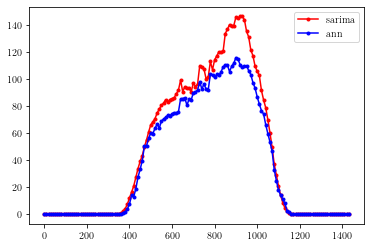

In [72]:
plt.plot(mae_sarima,'r.-',label='sarima')
plt.plot(mae_ann,'b.-',label='ann')
plt.legend()

In [14]:

metricas=['model','E_dmae','E_dmape','mae_Ig','$m$','$R^2$']
dfr2s=pd.DataFrame((r2s),columns=['$R^2$'])
dfms=pd.DataFrame((ms),columns=['$m$'])
linreg=pd.concat((dfms,dfr2s),axis=1)
df_allmetrics=pd.concat((df_metrics,linreg),axis=1)
df_allmetrics

,model,E_dmae,E_dmape,mae_Ig,$m$,$R^2$
0,CNN-LSTM,530.044127,11.204879,76.355088,0.97796249,0.937276
1,"SARIMA(0,1,1)",628.485508,12.481125,89.337116,0.95434095,0.916947
